# FACE RECOGNITION - DATA COLLECTION AND MODEL BUILDING - GUIDED PROJECT

In [1]:
import cv2 as cv
import numpy as np

## Collecting data using webcam

In [2]:
face_classifier = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

In [4]:
#Function to detect face and return the cropped image. Return the input image if no face is found.
def face_extractor(img):
    faces = face_classifier.detectMultiScale(img, 1.3, 5) #cordinates of the face
    if faces == (): #if no face found
        return None
    
    for (x,y,w,h) in faces:#cropping the face
        x=x-10
        y=y-10
        cropped_image = img[y:y+h+50, x:x+w+50]
    
    return cropped_image

In [45]:
#Collecting images using webcam

cap = cv.VideoCapture(0)
count = 0

while True:
    ret, frame = cap.read()
    if face_extractor(frame) is not None: #if face is detected then...
        count +=1 #..increase the count by 1 and...
        face = cv.resize(face_extractor(frame), (400,400)) #...resize the image to make it smaller for easier processing
        
        file_name_path = './Images/Test/Pravin/' + str(count) + '.jpg' #specify the name and path where you want to store the images
        cv.imwrite(file_name_path, face)
        
        cv.putText(face, str(count), (50, 50), cv.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        cv.imshow('Face Cropper', face)
        
    else:
        print("Face not detected")
        pass
    
    if cv.waitKey(1) == 13 or count == 30:
        break

cap.release()
cv.destroyAllWindows()
print("Image collection complete!")

<ipython-input-4-c49d91046ed8>:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if faces == (): #if no face found


Image collection complete!


## Model building

In [1]:
#Import the necessary libraries
from keras.layers import Flatten, Dense, Input
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import load_model
import tensorflow as tf
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#Resizing all images
IMAGE_SIZE = [224, 224]

In [3]:
pwd

'C:\\Users\\ARPITA\\Documents\\ISHITA\\DS Projects\\FaceRecognition'

In [4]:
train_path = './Images/Train/'
test_path = './Images/Test/'

In [5]:
#add preprocessing layer 
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
#Dont train the existing weights
for layer in vgg.layers:
    layer.trainable = False

In [7]:
#Names and number of classes
folders = glob('./Images/Train/*')

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('./Images/Train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 400 images belonging to 4 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('./Images/Test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 120 images belonging to 4 classes.


In [10]:
#Adding one layer after another. Multiplying flatten layer to the output that we recevied from vgg model.
#Then, we multiply the result with a dense neural network with 1000 units/neurons and then finally multiply this desnse
#with the output layer with a softmax activation function.

x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
prediction = Dense(units=len(folders), activation='sigmoid')(x)

In [11]:
model = Model(inputs=vgg.input, outputs=prediction)

In [12]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [13]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
m = model.fit(training_set, validation_data = test_set, epochs = 5,steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

Epoch 1/5
13/13 [==============================] - 182s 14s/step - loss: 1.5004 - accuracy: 0.2825 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 2/5
13/13 [==============================] - 190s 15s/step - loss: 1.3863 - accuracy: 0.2500 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 3/5
13/13 [==============================] - 190s 15s/step - loss: 1.3863 - accuracy: 0.2500 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 4/5
13/13 [==============================] - 183s 14s/step - loss: 1.3863 - accuracy: 0.2500 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 5/5
13/13 [==============================] - 184s 14s/step - loss: 1.3863 - accuracy: 0.2500 - val_loss: 1.3863 - val_accuracy: 0.2500


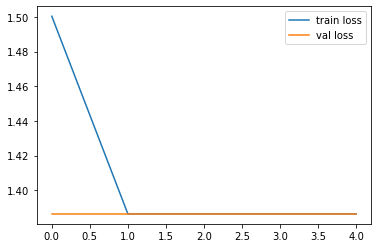

<Figure size 432x288 with 0 Axes>

In [15]:
#Visualising the train and test loss 
plt.plot(m.history['loss'], label= 'train loss')
plt.plot(m.history['val_loss'], label= 'val loss')
plt.legend()
plt.show()
plt.savefig('LossFig')

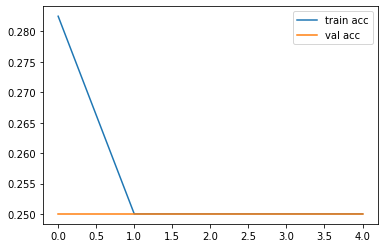

<Figure size 432x288 with 0 Axes>

In [16]:
#Visualising the train and test accuracy
plt.plot(m.history['accuracy'], label= 'train acc')
plt.plot(m.history['val_accuracy'], label= 'val acc')
plt.legend()
plt.show()
plt.savefig('AccuracyFig')

In [17]:
model.save('FaceDetectionModel_1.h5')